## Web Scraping

Scraping of websites is a very useful activity especially to achieve recruiting or marketing tasks. Using Python you can make this process smoother, using your time to focus on those profiles that have critical peculiarities. We encourage you to create your own Jupytor notebook and follow along. You can also download this notebook together with any affiliated data in the [Notebooks and Data](https://github.com/Master-of-Business-Analytics/Notebooks_and_Data) GitHub repository. Alternatively, if you do not have Python or Jupyter Notebook installed yet, you may experiment with a virtual notebook by launching Binder or Syzygy below (learn more about these two tools in the [Resource](https://analytics-at-sauder.github.io/resource.html) tab). 

<a href="https://ubc.syzygy.ca/jupyter/hub/user-redirect/git-pull?repo=https%3A%2F%2Fgithub.com%2FAnalytics-at-Sauder%2FProject_09_Web_Scraping&urlpath=tree%2FProject_09_Web_Scraping%2Fp09_web_scraping.ipynb&branch=master" target="_blank" class="button">Launch Syzygy (UBC)</a>

<a href="https://pims.syzygy.ca/jupyter/hub/user-redirect/git-pull?repo=https%3A%2F%2Fgithub.com%2FAnalytics-at-Sauder%2FProject_09_Web_Scraping&urlpath=tree%2FProject_09_Web_Scraping%2Fp09_web_scraping.ipynb&branch=master" target="_blank" class="button">Launch Syzygy (Google)</a>

<a href="https://mybinder.org/v2/gh/Analytics-at-Sauder/Project_09_Web_Scraping/master?filepath=p09_web_scraping.ipynb" target="_blank" class="button">Launch Binder</a>


## What is Web Scraping?

Web Scraping is a technique used to extract data from websites. A prerequisite to web scraping is knowing a little bit about HTML code to know where the data to be captured is located in the HTML code. If you have ever copy and pasted information from a website, you have performed the same function as any web scraper, only on a smaller, manual scale.

One way to scrape data is through Direct HTTP Requests. Websites are just a rendering of the HTML and CSS code that the web server returns as a result of a GET request of your browser. As a result, a simple script can send automatically HTTP requests and parse the answer, scraping the content. The python-requests package is used to make this request and enable data scraping.

Sometimes websites load the content asynchronously. This means that the information to be scraped may not be contained in the first HTTP response, but are loaded only as a consequence of a page scrolling or after the click of a button. To overcome this barrier a Web Browser Driver, Selenium Web Driver, is used. The Web Browser drivers let you run a real web browser enabling your Python script to emulate user behavior on the page.

Web scraping is a complicated process because all web pages do not follow the same format. Therefore, the code used to scrape data from a particular website can not be reapplied to another website. Therefore the python code has to customize the web-site's HTML structure. However, websites can not be scraped multiple times as this can overload the server hosting the website, especially smaller websites.

### Basic project

In this project, we will scrap a seven-day weather forecast from a static weather forecast website, forecast.weather.gov for Houston. 

First of all, load the required packages. The requests package is used to make a request to the website and enable us to download web pages that are loaded into the python environment

In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

<b> Request URL</b>

In [6]:

url = "https://forecast.weather.gov/MapClick.php?lat=29.685271900000032&lon=-95.43426899999997#.XvL4ti-z1ZJ"
#link of website
page = requests.get(url)
soup = BeautifulSoup(page.content, 'html.parser')

The BeautifulSoup constructor parses raw HTML strings and produces an object that mirrors the HTML document’s structure. This makes web scraping very easy as you are able to find all the HTML tags. The output is the source code of the website.
For example, the code below extracts all the a tag in the web page. The a tag defines a hyper-link, which is used to link from one page to another. 

In [7]:
#To find all the links in the web page (a-tags in the output)
print(soup.find_all('a')[0])



<a class="pull-left" href="http://www.noaa.gov" id="header-noaa"><img alt="National Oceanic and Atmospheric Administration" src="/css/images/header_noaa.png"/></a>


To identify the section that hosts tag the information that is needed, the source code of the web page can be checked by using the browser developer tools. The diagram below shows the web page and its corresponding source code. This is useful when identifying the tag id containing the information to be scraped from the web page.

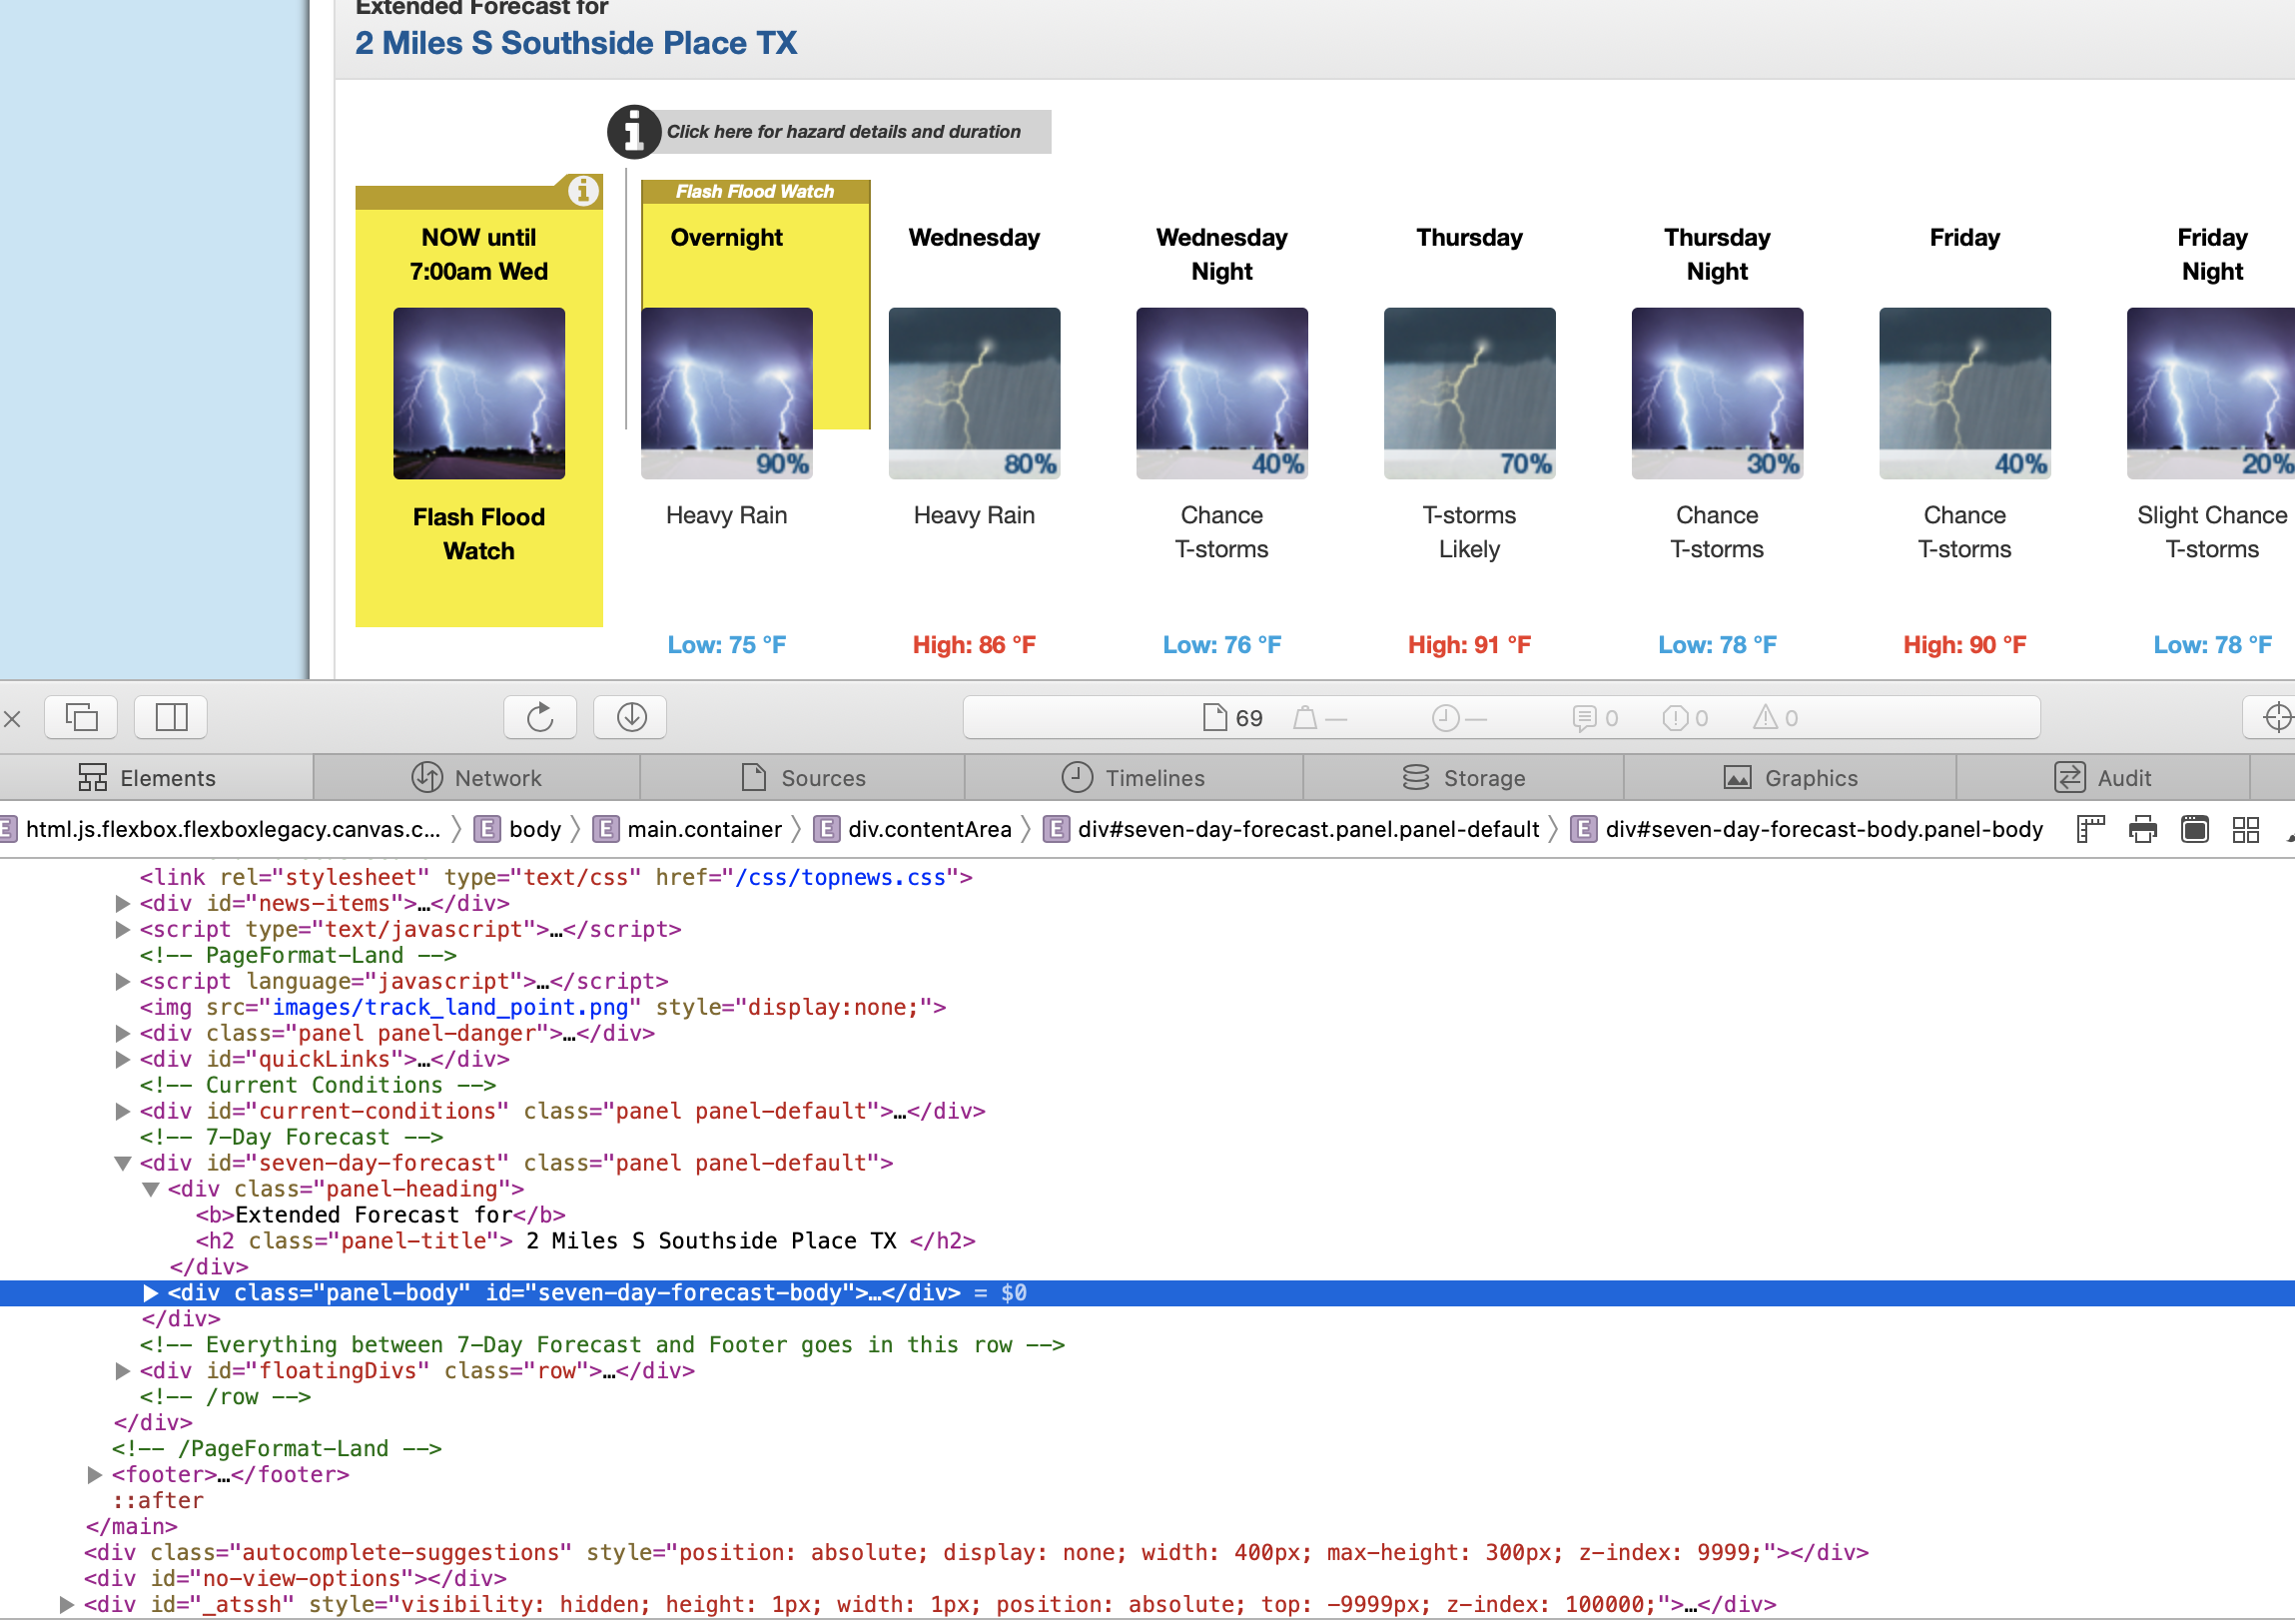

The developer source code shows that the tag id is seven-day-forecast-container. 

In [8]:
#component of the html code contacting weather information
week = soup.find(id='seven-day-forecast-body')


This shows every information contained in that tag id. To access all the items in this object week (weekdays), the information in the class tag  "tombstone-container" is captured.

In [9]:
#each day
items = week.find_all(class_= "tombstone-container")
#first day
day1=items[0] 
day1

<div class="tombstone-container">
<p class="period-name">Overnight<br/><br/></p>
<p><img alt="Overnight: A 30 percent chance of showers and thunderstorms.  Mostly cloudy, with a low around 78. Calm wind becoming east around 5 mph. " class="forecast-icon" src="newimages/medium/nscttsra30.png" title="Overnight: A 30 percent chance of showers and thunderstorms.  Mostly cloudy, with a low around 78. Calm wind becoming east around 5 mph. "/></p><p class="short-desc">Chance<br/>T-storms</p><p class="temp temp-low">Low: 78 °F</p></div>

Each item contains all coding and image relating to one day.  The information in each item in the item list is broken into columns: Day, weather description, and temperature.

In [56]:
print(day1.find(class_= "period-name").get_text())  #day

NOW until7:00am Wed


In [57]:
print(day1.find(class_= "short-desc").get_text()) #weather

Flash Flood Watch


In [58]:
items[1].find(class_= "temp").get_text()

'Low: 75 °F'

A for-loop is used to loop through the items list to get the column information for each day.

In [59]:
period_name=[]
for day in items:
    name=day.find(class_= "period-name").get_text()
    period_name.append(name)
period_name #period

['NOW until7:00am Wed',
 'Overnight',
 'Wednesday',
 'WednesdayNight',
 'Thursday',
 'ThursdayNight',
 'Friday',
 'FridayNight',
 'Saturday']

In [60]:
short_description = []
for day in items:
    name=day.find(class_= "short-desc").get_text()
    short_description.append(name)
short_description #period

['Flash Flood Watch',
 'Heavy Rain',
 'Heavy Rain',
 'T-storms thenChanceT-storms',
 'T-stormsLikely',
 'T-stormsLikely thenChanceT-storms',
 'ChanceT-storms',
 'ChanceT-storms',
 'ChanceT-storms']

In [61]:
temperature = []
for day in items:
    try:
        name=day.find(class_= "temp").get_text()
    except:
        name = "NA"
    temperature.append(name)
temperature

['NA',
 'Low: 75 °F',
 'High: 86 °F',
 'Low: 76 °F',
 'High: 91 °F',
 'Low: 78 °F',
 'High: 90 °F',
 'Low: 78 °F',
 'High: 92 °F']

The panda package is used to merge all output lists into a table.

In [62]:
weather_table = pd.DataFrame({'Period':period_name,
                             'Short description':short_description,
                             'Temperature':temperature})

weather_table

,Period,Short description,Temperature
0,NOW until7:00am Wed,Flash Flood Watch,NA
1,Overnight,Heavy Rain,Low: 75 °F
2,Wednesday,Heavy Rain,High: 86 °F
3,WednesdayNight,T-storms thenChanceT-storms,Low: 76 °F
4,Thursday,T-stormsLikely,High: 91 °F
5,ThursdayNight,T-stormsLikely thenChanceT-storms,Low: 78 °F
6,Friday,ChanceT-storms,High: 90 °F
7,FridayNight,ChanceT-storms,Low: 78 °F
8,Saturday,ChanceT-storms,High: 92 °F


This Table can be converted to a CSV file and used for data manipulation and analysis. This web scraping code can be used for different locations on the same website. Web scraping is an essential tool that almost every data analyst needs. 

## Conclusion

The incredible amount of data on the Internet is a rich resource for any field of research or personal interest. To effectively harvest that data, web scraping is a necessary skill. The Python library's requests and Beautiful Soup are powerful tools for the job. However, there are some challenges in web Scraping. Each website is unique and will need a customized treatment to extract the relevant information.Additionally, websites constantly change therefore once the site’s structure has changed, the scraper might not be able to find the relevant information.

Web scraping can be used for social media analysis, product analysis, or financial analysis. An alternative way of accessing web data is requesting access through an API. An API (Application Programming Interface) is a set of procedures and communication protocols that provide access to the data of an application, operating system, or other services. This [link](https://learn.datacamp.com/courses/importing-data-in-python-part-2) provides a valuable learning resource regarding API data Extraction. 
